STARUP FUNDING ANALYSIS IN BANGLORE

WHY THIS PROJECT IS DONE:

The Bengaluru startup funding project was undertaken to analyze trends in investment, understand which industries and startups are attracting the most capital, and identify patterns in investor behavior. Bengaluru is a leading startup hub in India, and studying its funding ecosystem helps us spot emerging sectors, top investors, and successful startups.It also helps in understanding market dynamics, such as whether growth is driven by a few large investments or many smaller deals, and which startups show sustained investor confidence.



In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")
sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (10, 6)

df = pd.read_excel("E:/Main Projects/Startup Dataset/startup_funding_bengaluru.xlsx")

print(df.shape)
print(df.info())
df.head()


(26, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Company             26 non-null     object
 1   Industry            26 non-null     object
 2   Funding_Amount_USD  26 non-null     int64 
 3   Investor            26 non-null     object
 4   Year                26 non-null     int64 
 5   City                26 non-null     object
dtypes: int64(2), object(4)
memory usage: 1.3+ KB
None


,Company,Industry,Funding_Amount_USD,Investor,Year,City
0,Cars24,Edtech,221000000,Lightspeed India,2015,Bengaluru
1,Curefit,Services,255000000,Bessemer Venture,2020,Bengaluru
2,Swiggy,Insurance,39000000,Y Combinator,2017,Bengaluru
3,Infra.Market,Logistics,36000000,General Atlantic,2013,Bengaluru
4,Oyo Rooms,Transportation,126000000,Y Combinator,2012,Bengaluru


FUNDING AND GROWTH

1.Year-on-Year Growth 

    Year  Funding_Amount_USD  Number_of_Deals
0   2010           131000000                1
1   2011           288000000                1
2   2012           790000000                4
3   2013           258000000                2
4   2014            81000000                1
5   2015           221000000                1
6   2017           191000000                2
7   2018           499000000                2
8   2020           289000000                2
9   2021           580000000                4
10  2022           711000000                4
11  2023           235000000                1
12  2025           151000000                1


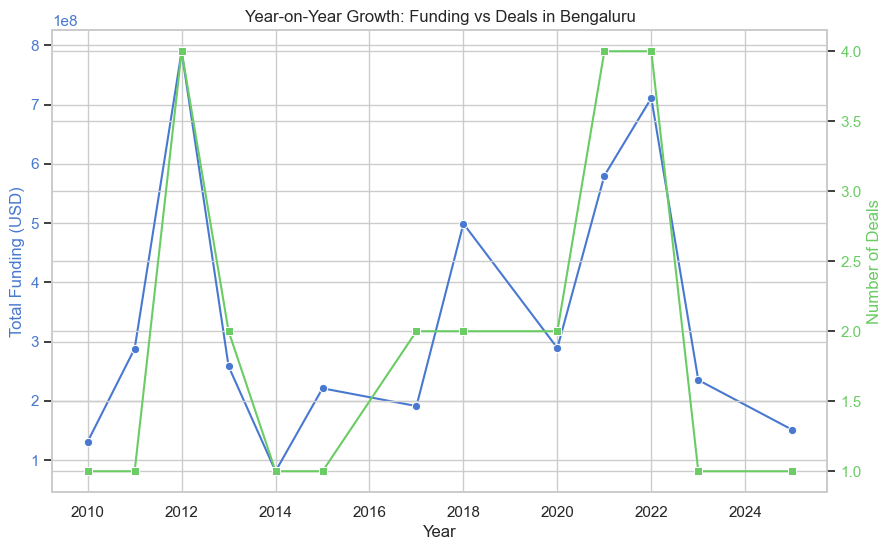

In [3]:
funding_trends = df.groupby("Year")["Funding_Amount_USD"].sum().reset_index()
deal_count = df.groupby("Year")["Company"].count().reset_index()
deal_count.rename(columns={"Company": "Number_of_Deals"}, inplace=True)

yearly_trends = pd.merge(funding_trends, deal_count, on="Year")

print(yearly_trends)

fig, ax1 = plt.subplots()

sns.lineplot(data=yearly_trends, x="Year", y="Funding_Amount_USD", marker="o", color="b", ax=ax1)
ax1.set_ylabel("Total Funding (USD)", color="b")
ax1.tick_params(axis="y", labelcolor="b")

ax2 = ax1.twinx()
sns.lineplot(data=yearly_trends, x="Year", y="Number_of_Deals", marker="s", color="g", ax=ax2)
ax2.set_ylabel("Number of Deals", color="g")
ax2.tick_params(axis="y", labelcolor="g")

plt.title("Year-on-Year Growth: Funding vs Deals in Bengaluru")
plt.show()
fig = px.bar(yearly_trends, x="Year", y="Funding_Amount_USD",
             text="Funding_Amount_USD", title="Yearly Total Funding in Bengaluru")
fig.show()

fig2 = px.line(yearly_trends, x="Year", y="Number_of_Deals",
               markers=True, title="Yearly Number of Deals in Bengaluru")
fig2.show()


OBSERVATION: Bengaluru’s startup funding shows varying patterns over the years. Some years saw massive funding driven by a few large deals, while others had more deals but smaller amounts. This highlights that growth is shaped not just by the number of startups funded, but also by the scale of investments.

2.Deal Size Evolution 

In [4]:
avg_deal_size = df.groupby("Year")["Funding_Amount_USD"].mean().reset_index()

print(avg_deal_size)

fig = px.line(avg_deal_size, x="Year", y="Funding_Amount_USD",
              markers=True, title="Average Deal Size Evolution (Interactive)")
fig.update_traces(line_color="purple")
fig.show()


    Year  Funding_Amount_USD
0   2010         131000000.0
1   2011         288000000.0
2   2012         197500000.0
3   2013         129000000.0
4   2014          81000000.0
5   2015         221000000.0
6   2017          95500000.0
7   2018         249500000.0
8   2020         144500000.0
9   2021         145000000.0
10  2022         177750000.0
11  2023         235000000.0
12  2025         151000000.0


OBSERVATION: This analysis shows the average size of funding rounds per year in Bengaluru. Instead of just looking at total money or number of deals, it highlights how much funding startups typically received on average. The trend helps us see whether investors are writing bigger checks over time or keeping deal sizes smaller, even if the number of deals increases.

INDUSTRY & SECTOR

3.Industry Attractiveness 

In [5]:
industry_funding = df.groupby("Industry")["Funding_Amount_USD"].sum().sort_values(ascending=False).reset_index()

print(industry_funding.head(10))

fig = px.bar(industry_funding.head(10), 
             x="Industry", y="Funding_Amount_USD", 
             text="Funding_Amount_USD", 
             title="Top 10 Funded Industries (Interactive)")
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

top_industries = industry_funding.head(5)["Industry"]
industry_trend = df[df["Industry"].isin(top_industries)]
industry_trend = industry_trend.groupby(["Year", "Industry"])["Funding_Amount_USD"].sum().reset_index()

fig2 = px.line(industry_trend, x="Year", y="Funding_Amount_USD", color="Industry",
               markers=True, title="Funding Trends of Top 5 Industries Over Time")
fig2.show()


         Industry  Funding_Amount_USD
0        Services           735000000
1       Logistics           686000000
2            Saas           653000000
3         Fintech           650000000
4      Healthcare           370000000
5          Retail           300000000
6  Transportation           245000000
7      E-Commerce           235000000
8          Edtech           221000000
9       Insurance           184000000


OBSERVATION: This analysis highlights which industries attract the most funding in Bengaluru and how their funding has evolved over time. The bar chart shows the leading industries by total investment, while the line chart reveals the yearly trends of the top 5. This helps identify sectors that consistently attract investors (steady growth) versus those that see sudden spikes (driven by big-ticket deals).

4.Emerging Sectors 

In [6]:
industry_first_year = df.groupby("Industry")["Year"].min().reset_index()
industry_first_year.rename(columns={"Year": "First_Funding_Year"}, inplace=True)

emerging_industries = industry_first_year.sort_values("First_Funding_Year", ascending=False)

print("Industries by their first funding year:")
print(emerging_industries.head(10))

industry_yearly_funding = df.groupby(["Year", "Industry"])["Funding_Amount_USD"].sum().reset_index()
emerging_trend = pd.merge(industry_yearly_funding, industry_first_year, on="Industry")

recent_emerging = emerging_trend[emerging_trend["First_Funding_Year"] >= 2018]

fig = px.line(recent_emerging, x="Year", y="Funding_Amount_USD", 
              color="Industry", markers=True, 
              title="Emerging Sectors in Bengaluru (Interactive)")
fig.show()


Industries by their first funding year:
          Industry  First_Funding_Year
0       E-Commerce                2023
5      Hospitality                2021
3         Foodtech                2020
8           Retail                2018
6        Insurance                2017
1           Edtech                2015
7        Logistics                2012
4       Healthcare                2012
11  Transportation                2012
9             Saas                2012


OBSERVATION: Analysis of the funding data reveals several emerging industries that have gained traction post-2018. These sectors, characterized by their recent first-time funding events, indicate growing investor interest and potential for rapid future growth. Highlighting these industries provides strategic insight for identifying new market opportunities

INVESTOR DYNAMICS

5.Investor Influence 

Top 10 Investors by Total Funding:
             Investor  Funding_Amount_USD
0             Naspers           806000000
1        Y Combinator           518000000
2         Falcon Edge           451000000
3            Softbank           434000000
4               Accel           389000000
5    Bessemer Venture           367000000
6        Tiger Global           358000000
7    General Atlantic           285000000
8  Westbridge Capital           224000000
9    Lightspeed India           221000000


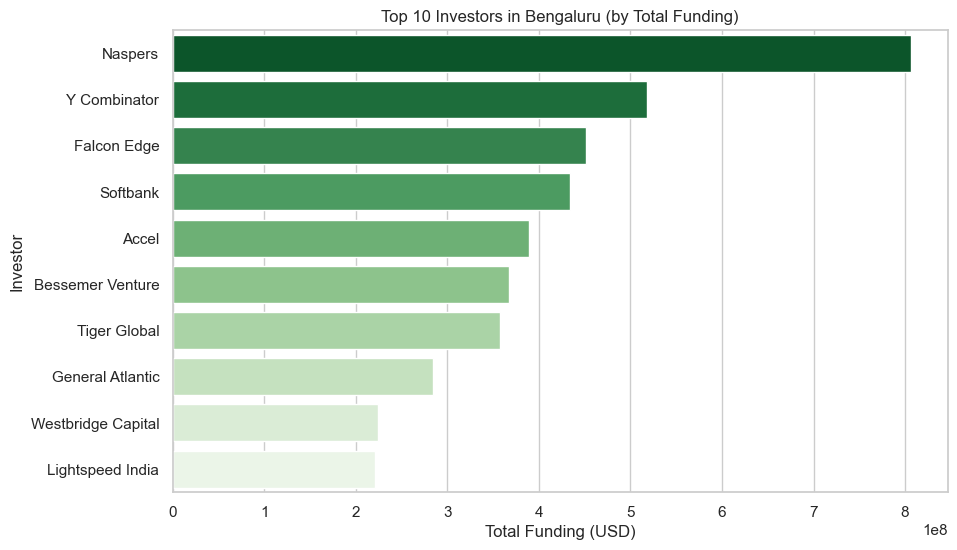

In [15]:
investor_funding = df.groupby("Investor")["Funding_Amount_USD"].sum().sort_values(ascending=False).reset_index()

print("Top 10 Investors by Total Funding:")
print(investor_funding.head(10))

sns.barplot(data=investor_funding.head(10), 
            x="Funding_Amount_USD", 
            y="Investor", 
            palette="Greens_r")
plt.title("Top 10 Investors in Bengaluru (by Total Funding)")
plt.xlabel("Total Funding (USD)")
plt.ylabel("Investor")
plt.show()

top10_total = investor_funding.head(10)["Funding_Amount_USD"].sum()
others_total = investor_funding["Funding_Amount_USD"].sum() - top10_total
concentration_df = pd.DataFrame({
    "Category": ["Top 10 Investors", "Others"],
    "Funding_Amount_USD": [top10_total, others_total]
})

fig2 = px.pie(concentration_df, values="Funding_Amount_USD", names="Category", 
              title="Funding Concentration: Top 10 Investors vs Others")
fig2.show()


OBSERVATION: The analysis of investor activity in Bengaluru shows a clear concentration of funding among a few key players. The top 10 investors account for a substantial portion of total funding, highlighting their dominant role in driving the startup ecosystem. Visualizations of both the funding distribution and concentration reveal how resources are clustered, providing insight into potential strategic partnerships and market influence

6.Investor–Industry Relationship

In [8]:
investor_industry = df.groupby(["Investor", "Industry"])["Funding_Amount_USD"].sum().reset_index()

top_investors = df.groupby("Investor")["Funding_Amount_USD"].sum().sort_values(ascending=False).head(10).index
top_investor_industry = investor_industry[investor_industry["Investor"].isin(top_investors)]

fig = px.treemap(top_investor_industry, 
                 path=["Investor", "Industry"], 
                 values="Funding_Amount_USD",
                 title="Investor–Industry Relationship (Top 10 Investors)")
fig.show()


OBSERVATION: Examining the funding patterns of the top 10 investors reveals their industry preferences and strategic focus areas. The treemap visualization highlights which sectors attract the most capital from each leading investor, providing insights into investment trends and potential opportunities for startups seeking targeted funding.

STARTUP PERFORMANCE

7.Startup Leaders 

In [9]:
startup_funding = df.groupby(["Company", "Industry"])["Funding_Amount_USD"].sum().reset_index()
startup_funding = startup_funding.sort_values(by="Funding_Amount_USD", ascending=False)

print("Top 10 Funded Startups in Bengaluru:")
print(startup_funding.head(10))

fig = px.bar(startup_funding.head(10), 
             x="Company", y="Funding_Amount_USD", 
             color="Industry", text="Funding_Amount_USD",
             title="Top 10 Funded Startups in Bengaluru (Interactive)")
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()


Top 10 Funded Startups in Bengaluru:
          Company    Industry  Funding_Amount_USD
24      Urbanclap      Retail           300000000
2         Curefit     Fintech           288000000
13       Nobroker    Services           277000000
3         Curefit    Services           255000000
17  Physicswallah   Logistics           249000000
5           Dunzo  E-Commerce           235000000
6        Flipkart   Logistics           224000000
4       Delhivery     Fintech           222000000
11           Navi        Saas           221000000
0          Cars24      Edtech           221000000


OBSERVATION: The analysis identifies Bengaluru’s top 10 funded startups, revealing which companies have attracted the most capital and the industries driving this investment. The interactive bar chart highlights both the scale of funding and the sectoral distribution, offering a clear view of the leading players in the city’s startup ecosystem.

8.Repeat Funding 

Top startups with repeat funding:
     Company  Years_Funded  Funding_Amount_USD
2    Curefit             2           543000000
8     Meesho             2           179000000
10  Nobroker             2           429000000
18    Swiggy             2           170000000


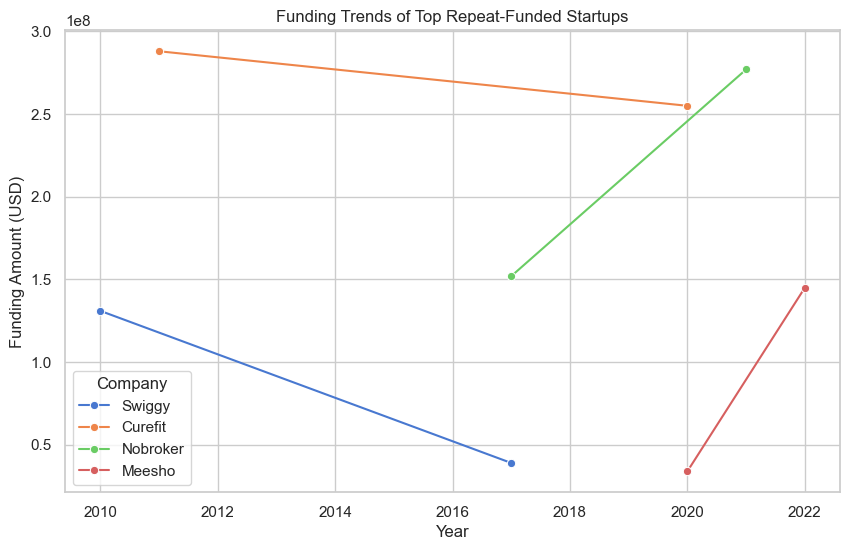

In [10]:
repeat_funding = df.groupby("Company")["Year"].nunique().reset_index()
repeat_funding.rename(columns={"Year": "Years_Funded"}, inplace=True)

company_total_funding = df.groupby("Company")["Funding_Amount_USD"].sum().reset_index()
repeat_funding = repeat_funding.merge(company_total_funding, on="Company")
repeat_startups = repeat_funding[repeat_funding["Years_Funded"] > 1].sort_values(by="Years_Funded", ascending=False)

print("Top startups with repeat funding:")
print(repeat_startups.head(10))

fig = px.scatter(repeat_startups.head(30), 
                 x="Years_Funded", y="Funding_Amount_USD", 
                 color="Company", size="Funding_Amount_USD",
                 title="Repeat Funding: Years vs Total Funding",
                 hover_data=["Company"])
fig.show()

trend_data = df[df["Company"].isin(repeat_startups.head(5)["Company"])]
trend_data = trend_data.groupby(["Year", "Company"])["Funding_Amount_USD"].sum().reset_index()

sns.lineplot(data=trend_data, x="Year", y="Funding_Amount_USD", hue="Company", marker="o")
plt.title("Funding Trends of Top Repeat-Funded Startups")
plt.ylabel("Funding Amount (USD)")
plt.show()

OBSEVATION: Several startups in Bengaluru have received funding multiple times, indicating strong investor confidence and sustained growth potential. The scatter plot highlights the relationship between the number of funding rounds and total funding received, while the trend analysis of top repeat-funded startups shows how their capital inflows have evolved over the years, providing insights into successful growth trajectories

CONCLUSION:

Bengaluru’s startup ecosystem shows strong growth with emerging industries attracting significant investor interest post-2018. Funding is concentrated among a few key investors who demonstrate clear industry preferences, shaping the city’s investment landscape. Top-funded and repeat-funded startups highlight where capital and confidence are focused, revealing scalable business models and growth momentum. Overall, these insights provide a clear view of high-potential sectors, leading investors, and startups driving the region’s innovation economy.

FUTURE USE/ APPLICATIONS:

Investors can use this analysis to identify high-potential startups and sectors for funding.Entrepreneurs can see industry trends and benchmark their funding strategies.Policy makers and incubators can use it to support emerging industries and encourage investment in underrepresented sectors.Overall, the insights from this project can guide funding decisions, strategy planning, and market research for various stakeholders in Bengaluru’s startup ecosystem.